# Introdução à Análise de Dados com Pandas
## Processo Seletivo LADS - Etapa 2

### Instruções:
- Este notebook é um guia introdutório à análise de dados com Pandas
- Cada seção contém exemplos explicativos e exercícios práticos
- Complete todos os exercícios nas células marcadas com "SEU CÓDIGO AQUI"

### O que será avaliado:
- Compreensão dos conceitos apresentados
- Capacidade de aplicar os conceitos em problemas práticos
- Organização e clareza do código
- Análise e interpretação dos resultados

### Instruções importantes antes de começar:

- **Execute todas as células de código em ordem sequencial** (de cima para baixo)
- Não pule células de código, mesmo que pareçam não ter outputs visíveis
- Isso garantirá que todas as variáveis necessárias estejam carregadas para os exercícios
- Se encontrar erros do tipo "variável não definida", volte e verifique se todas as células anteriores foram executadas

- Para executar uma célula de código, você pode:
  - Pressionar **Ctrl + Enter** enquanto estiver na célula
  - Ou clicar no botão ▶️ (play) na barra de ferramentas do seu editor de código

---

### Antes de começar, execute a célula abaixo e digite seu nome completo:

In [1]:
nome = input('Seu nome: ')
print(f"Olá, {nome.title()}! Estamos animados para iniciar essa jornada de análise de dados com você!")


Olá, Guilherme! Estamos animados para iniciar essa jornada de análise de dados com você!


---

## 1. Primeiros Passos com Pandas

### 1.1 O que é o Pandas?

Pandas é uma biblioteca Python para análise e manipulação de dados. Ele oferece estruturas de dados flexíveis e ferramentas para trabalhar com dados estruturados de forma eficiente.

As duas principais estruturas de dados do Pandas são:
- **Series**: Array unidimensional rotulado
- **DataFrame**: Estrutura bidimensional tabular com colunas rotuladas

Vamos começar importando as bibliotecas necessárias:

In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Configurando o matplotlib para mostrar gráficos no notebook
%matplotlib inline

# Para ignorar os avisos desnecessários
import warnings
warnings.filterwarnings('ignore')

### 1.2 Criando um DataFrame

Vamos criar um conjunto de dados de exemplo sobre vendas de uma loja virtual:

In [3]:
# Criando um dataset de exemplo
np.random.seed(42)  # Para garantir reprodutibilidade

# Criando dados de exemplo
datas = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
categorias = ['Eletrônicos', 'Roupas', 'Alimentos', 'Casa', 'Beleza']
produtos = {
    'Eletrônicos': ['Smartphone', 'Laptop', 'Tablet', 'Fones de ouvido', 'Smart TV'],
    'Roupas': ['Camiseta', 'Calça', 'Vestido', 'Sapato', 'Jaqueta'],
    'Alimentos': ['Arroz', 'Feijão', 'Óleo', 'Açúcar', 'Café'],
    'Casa': ['Sofá', 'Mesa', 'Cadeira', 'Cama', 'Armário'],
    'Beleza': ['Shampoo', 'Condicionador', 'Sabonete', 'Perfume', 'Hidratante']
}
regioes = ['Norte', 'Nordeste', 'Centro-Oeste', 'Sudeste', 'Sul']
estados = {
    'Norte': ['AM', 'PA', 'RO', 'RR', 'AC'],
    'Nordeste': ['BA', 'PE', 'CE', 'MA', 'PB'],
    'Centro-Oeste': ['DF', 'GO', 'MT', 'MS'],
    'Sudeste': ['SP', 'RJ', 'MG', 'ES'],
    'Sul': ['PR', 'SC', 'RS']
}
canais = ['Online', 'Loja Física', 'Aplicativo', 'Telefone']

# Gerando 1000 registros aleatórios
n_registros = 1000
data_vendas = []

for _ in range(n_registros):
    data = np.random.choice(datas)
    categoria = np.random.choice(categorias)
    produto = np.random.choice(produtos[categoria])
    regiao = np.random.choice(regioes)
    estado = np.random.choice(estados[regiao])
    canal = np.random.choice(canais)
    valor = round(np.random.uniform(10, 5000), 2)  # Valor entre R$10 e R$5000
    quantidade = np.random.randint(1, 10)  # Entre 1 e 9 itens
    avaliacao = np.random.randint(1, 6)  # Avaliação de 1 a 5 estrelas
    
    data_vendas.append({
        'data': data,
        'categoria': categoria,
        'produto': produto,
        'regiao': regiao,
        'estado': estado,
        'canal_venda': canal,
        'valor_venda': valor,
        'quantidade': quantidade,
        'avaliacao': avaliacao
    })

# Criando o DataFrame
df_vendas = pd.DataFrame(data_vendas)
df_vendas['data'] = df_vendas['data'].astype('object')

# Salvando como CSV para uso futuro
df_vendas.to_csv('dados_vendas.csv', index=False)

# Visualizando as primeiras linhas
df_vendas.head()

,data,categoria,produto,regiao,estado,canal_venda,valor_venda,quantidade,avaliacao
0,2023-04-13 00:00:00,Casa,Armário,Centro-Oeste,MS,Online,2988.28,3,3
1,2023-03-29 00:00:00,Beleza,Perfume,Centro-Oeste,GO,Online,4849.85,6,2
2,2023-07-11 00:00:00,Casa,Armário,Norte,RR,Loja Física,2628.53,9,1
3,2023-02-28 00:00:00,Roupas,Sapato,Sudeste,ES,Aplicativo,2285.79,3,4
4,2023-02-24 00:00:00,Casa,Sofá,Centro-Oeste,DF,Aplicativo,3404.73,9,2


### 1.3 Explorando os Dados Básicos

No Pandas, existem vários métodos para explorar e entender os dados:

In [14]:
# Visualizando as primeiras linhas com head()
print("Primeiras 5 linhas do DataFrame:")
df_vendas.head()

Primeiras 5 linhas do DataFrame:


,data,categoria,produto,regiao,estado,canal_venda,valor_venda,quantidade,avaliacao
0,2023-04-13 00:00:00,Casa,Armário,Centro-Oeste,MS,Online,2988.28,3,3
1,2023-03-29 00:00:00,Beleza,Perfume,Centro-Oeste,GO,Online,4849.85,6,2
2,2023-07-11 00:00:00,Casa,Armário,Norte,RR,Loja Física,2628.53,9,1
3,2023-02-28 00:00:00,Roupas,Sapato,Sudeste,ES,Aplicativo,2285.79,3,4
4,2023-02-24 00:00:00,Casa,Sofá,Centro-Oeste,DF,Aplicativo,3404.73,9,2


In [5]:
# Visualizando as últimas linhas com tail()
print("Últimas 5 linhas do DataFrame:")
df_vendas.tail()

Últimas 5 linhas do DataFrame:


,data,categoria,produto,regiao,estado,canal_venda,valor_venda,quantidade,avaliacao
995,2023-11-11 00:00:00,Eletrônicos,Laptop,Nordeste,MA,Online,3838.49,9,2
996,2023-05-12 00:00:00,Alimentos,Feijão,Centro-Oeste,GO,Loja Física,540.33,1,3
997,2023-11-27 00:00:00,Beleza,Shampoo,Centro-Oeste,DF,Loja Física,4176.15,2,1
998,2023-11-06 00:00:00,Roupas,Calça,Nordeste,PE,Loja Física,2413.13,3,4
999,2023-05-16 00:00:00,Alimentos,Óleo,Sudeste,MG,Loja Física,1162.59,1,3


In [6]:
# Verificando o formato do DataFrame (linhas, colunas) com shape
print(f"Formato do DataFrame: {df_vendas.shape}")
print(f"Número de linhas: {df_vendas.shape[0]}")
print(f"Número de colunas: {df_vendas.shape[1]}")

Formato do DataFrame: (1000, 9)
Número de linhas: 1000
Número de colunas: 9


In [7]:
print("Nomes das colunas:")
print(df_vendas.columns.tolist())

Nomes das colunas:
['data', 'categoria', 'produto', 'regiao', 'estado', 'canal_venda', 'valor_venda', 'quantidade', 'avaliacao']


### 1.4 Informações e Estatísticas do DataFrame

Pandas oferece métodos para obter informações detalhadas e estatísticas do DataFrame:

In [8]:
# Verificando informações sobre o DataFrame com info()
print("Informações do DataFrame:")
df_vendas.info()

Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   data         1000 non-null   object 
 1   categoria    1000 non-null   object 
 2   produto      1000 non-null   object 
 3   regiao       1000 non-null   object 
 4   estado       1000 non-null   object 
 5   canal_venda  1000 non-null   object 
 6   valor_venda  1000 non-null   float64
 7   quantidade   1000 non-null   int64  
 8   avaliacao    1000 non-null   int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 70.4+ KB


In [9]:
# Estatísticas descritivas com describe()
print("Estatísticas descritivas:")
df_vendas.describe()

Estatísticas descritivas:


,valor_venda,quantidade,avaliacao
count,1000.00000,1000.00000,1000.000000
mean,2436.61369,5.02400,3.065000
std,1459.09861,2.60196,1.413072
min,11.13000,1.00000,1.000000
25%,1168.71000,3.00000,2.000000
50%,2418.67000,5.00000,3.000000
75%,3702.18000,7.00000,4.000000
max,4997.31000,9.00000,5.000000


In [10]:
# Contagem de valores únicos com nunique()
print("Número de valores únicos em cada coluna:")
df_vendas.nunique()

Número de valores únicos em cada coluna:


data            338
categoria         5
produto          25
regiao            5
estado           21
canal_venda       4
valor_venda    1000
quantidade        9
avaliacao         5
dtype: int64

### 1.5 Verificando Valores Únicos e Nulos

In [11]:
# Verificando valores únicos em uma coluna categórica
print("Categorias únicas:")
df_vendas['categoria'].unique()

Categorias únicas:


array([np.str_('Casa'), np.str_('Beleza'), np.str_('Roupas'),
       np.str_('Alimentos'), np.str_('Eletrônicos')], dtype=object)

In [12]:
# Contando ocorrências de cada valor
print("Contagem de cada categoria:")
df_vendas['categoria'].value_counts()

Contagem de cada categoria:


categoria
Alimentos      212
Beleza         209
Roupas         200
Eletrônicos    191
Casa           188
Name: count, dtype: int64

In [13]:
print("Valores nulos em cada coluna:")
df_vendas.isnull().sum()

Valores nulos em cada coluna:


data           0
categoria      0
produto        0
regiao         0
estado         0
canal_venda    0
valor_venda    0
quantidade     0
avaliacao      0
dtype: int64

#### Exercício 1: Exploração Básica de Dados
Agora é sua vez de aplicar o que aprendeu para explorar o DataFrame:

##### 1.1 Use o método head() para mostrar as 10 primeiras linhas do DataFrame

In [16]:
df_vendas.head(10)

,data,categoria,produto,regiao,estado,canal_venda,valor_venda,quantidade,avaliacao
0,2023-04-13 00:00:00,Casa,Armário,Centro-Oeste,MS,Online,2988.28,3,3
1,2023-03-29 00:00:00,Beleza,Perfume,Centro-Oeste,GO,Online,4849.85,6,2
2,2023-07-11 00:00:00,Casa,Armário,Norte,RR,Loja Física,2628.53,9,1
3,2023-02-28 00:00:00,Roupas,Sapato,Sudeste,ES,Aplicativo,2285.79,3,4
4,2023-02-24 00:00:00,Casa,Sofá,Centro-Oeste,DF,Aplicativo,3404.73,9,2
5,2023-03-30 00:00:00,Casa,Mesa,Nordeste,BA,Loja Física,497.38,4,4
6,2023-09-21 00:00:00,Alimentos,Arroz,Sudeste,RJ,Telefone,3779.25,6,2
7,2023-09-17 00:00:00,Beleza,Condicionador,Nordeste,MA,Loja Física,1981.80,4,4
8,2023-07-09 00:00:00,Beleza,Hidratante,Nordeste,PB,Telefone,1790.20,9,5
9,2023-01-15 00:00:00,Beleza,Shampoo,Norte,AM,Telefone,1980.46,8,3


##### 1.2 Use shape para verificar quantas linhas e colunas tem o DataFrame

In [20]:
print(f"O DataFrame possui {df_vendas.shape[0]} linhas e {df_vendas.shape[1]} colunas.")

O DataFrame possui 1000 linhas e 9 colunas.


##### 1.3 Use o método unique() para listar todas as regiões no DataFrame

In [21]:
print(df_vendas['regiao'].unique())

[np.str_('Centro-Oeste') np.str_('Norte') np.str_('Sudeste')
 np.str_('Nordeste') np.str_('Sul')]


##### 1.4 Use o método value_counts() para contar quantas vendas existem por canal_venda

In [22]:
print(df_vendas['canal_venda'].value_counts())

canal_venda
Loja Física    267
Telefone       251
Online         247
Aplicativo     235
Name: count, dtype: int64


##### 1.5 Use o método describe() para obter estatísticas da coluna 'valor_venda'

In [23]:
print(df_vendas['valor_venda'].describe())

count    1000.00000
mean     2436.61369
std      1459.09861
min        11.13000
25%      1168.71000
50%      2418.67000
75%      3702.18000
max      4997.31000
Name: valor_venda, dtype: float64


---

## 2. Seleção e Filtragem de Dados

### 2.1 Selecionando Colunas

O Pandas oferece várias maneiras de selecionar colunas em um DataFrame:

In [24]:
# Selecionando uma única coluna (retorna uma Series)
valores_venda = df_vendas['valor_venda']
print("Primeiros 5 valores da coluna 'valor_venda':")
valores_venda.head()

Primeiros 5 valores da coluna 'valor_venda':


0    2988.28
1    4849.85
2    2628.53
3    2285.79
4    3404.73
Name: valor_venda, dtype: float64

In [25]:
print(f"Tipo de dados: {type(valores_venda)}")

Tipo de dados: <class 'pandas.core.series.Series'>


In [26]:
# Selecionando múltiplas colunas (retorna um DataFrame)
selecao = df_vendas[['produto', 'valor_venda', 'quantidade']]

print("Primeiras 5 linhas das colunas selecionadas:")
selecao.head()

Primeiras 5 linhas das colunas selecionadas:


,produto,valor_venda,quantidade
0,Armário,2988.28,3
1,Perfume,4849.85,6
2,Armário,2628.53,9
3,Sapato,2285.79,3
4,Sofá,3404.73,9


In [27]:
print(f"Tipo de dados: {type(selecao)}")

Tipo de dados: <class 'pandas.core.frame.DataFrame'>


### 2.2 Filtrando Linhas com Condições

Podemos filtrar linhas do DataFrame usando condições lógicas:

In [28]:
# Filtragem básica: vendas com valor acima de 1000
vendas_altas = df_vendas[df_vendas['valor_venda'] > 1000]
print(f"Número de vendas com valor acima de R$1000: {len(vendas_altas)}")

print("Primeiras 5 vendas com valor acima de R$1000:")
vendas_altas.head()

Número de vendas com valor acima de R$1000: 785
Primeiras 5 vendas com valor acima de R$1000:


,data,categoria,produto,regiao,estado,canal_venda,valor_venda,quantidade,avaliacao
0,2023-04-13 00:00:00,Casa,Armário,Centro-Oeste,MS,Online,2988.28,3,3
1,2023-03-29 00:00:00,Beleza,Perfume,Centro-Oeste,GO,Online,4849.85,6,2
2,2023-07-11 00:00:00,Casa,Armário,Norte,RR,Loja Física,2628.53,9,1
3,2023-02-28 00:00:00,Roupas,Sapato,Sudeste,ES,Aplicativo,2285.79,3,4
4,2023-02-24 00:00:00,Casa,Sofá,Centro-Oeste,DF,Aplicativo,3404.73,9,2


In [29]:
# Filtrando com múltiplas condições usando operadores lógicos & (AND) e | (OR)

# Vendas de Eletrônicos na região Sul
vendas_eletronicos_sul = df_vendas[(df_vendas['categoria'] == 'Eletrônicos') & 
                                   (df_vendas['regiao'] == 'Sul')]
print(f"Número de vendas de Eletrônicos na região Sul: {len(vendas_eletronicos_sul)}")

print("Primeiras 5 vendas de Eletrônicos na região Sul:")
vendas_eletronicos_sul.head()

Número de vendas de Eletrônicos na região Sul: 46
Primeiras 5 vendas de Eletrônicos na região Sul:


,data,categoria,produto,regiao,estado,canal_venda,valor_venda,quantidade,avaliacao
43,2023-04-27 00:00:00,Eletrônicos,Fones de ouvido,Sul,PR,Loja Física,4576.92,2,1
48,2023-04-06 00:00:00,Eletrônicos,Smart TV,Sul,RS,Loja Física,142.29,4,4
65,2023-12-27 00:00:00,Eletrônicos,Tablet,Sul,SC,Online,1880.60,1,1
107,2023-05-25 00:00:00,Eletrônicos,Laptop,Sul,RS,Aplicativo,593.32,6,3
109,2023-02-07 00:00:00,Eletrônicos,Smartphone,Sul,PR,Aplicativo,3722.29,4,2


In [30]:
# Filtrando com OR lógico

# Vendas muito altas (>3000) ou com avaliação máxima (5)
vendas_premium = df_vendas[(df_vendas['valor_venda'] > 3000) | 
                          (df_vendas['avaliacao'] == 5)]

print(f"Número de vendas premium: {len(vendas_premium)}")

print("Primeiras 5 vendas premium:")
vendas_premium.head()

Número de vendas premium: 519
Primeiras 5 vendas premium:


,data,categoria,produto,regiao,estado,canal_venda,valor_venda,quantidade,avaliacao
1,2023-03-29 00:00:00,Beleza,Perfume,Centro-Oeste,GO,Online,4849.85,6,2
4,2023-02-24 00:00:00,Casa,Sofá,Centro-Oeste,DF,Aplicativo,3404.73,9,2
6,2023-09-21 00:00:00,Alimentos,Arroz,Sudeste,RJ,Telefone,3779.25,6,2
8,2023-07-09 00:00:00,Beleza,Hidratante,Nordeste,PB,Telefone,1790.20,9,5
10,2023-03-22 00:00:00,Alimentos,Óleo,Norte,RO,Online,4632.24,9,4


### 2.3 Filtragem com isin() e between()

Pandas oferece métodos especiais para filtragens mais específicas:

In [31]:
# Usando isin() para filtrar com uma lista de valores

# Vendas nas regiões Sul e Sudeste
regioes_sul_sudeste = ['Sul', 'Sudeste']
vendas_sul_sudeste = df_vendas[df_vendas['regiao'].isin(regioes_sul_sudeste)]

print(f"Número de vendas nas regiões Sul e Sudeste: {len(vendas_sul_sudeste)}")

print("Primeiras 5 vendas nas regiões Sul e Sudeste:")
vendas_sul_sudeste.head()

Número de vendas nas regiões Sul e Sudeste: 413
Primeiras 5 vendas nas regiões Sul e Sudeste:


,data,categoria,produto,regiao,estado,canal_venda,valor_venda,quantidade,avaliacao
3,2023-02-28 00:00:00,Roupas,Sapato,Sudeste,ES,Aplicativo,2285.79,3,4
6,2023-09-21 00:00:00,Alimentos,Arroz,Sudeste,RJ,Telefone,3779.25,6,2
14,2023-02-21 00:00:00,Beleza,Perfume,Sul,RS,Aplicativo,2057.81,4,5
15,2023-06-09 00:00:00,Alimentos,Óleo,Sudeste,RJ,Loja Física,4042.52,9,5
16,2023-05-14 00:00:00,Casa,Cama,Sudeste,ES,Telefone,4463.87,7,4


In [32]:
# Usando between() para filtrar valores em um intervalo

# Vendas com valor entre 1000 e 2000
vendas_1000_2000 = df_vendas[df_vendas['valor_venda'].between(1000, 2000)]

print(f"Número de vendas entre R$1000 e R$2000: {len(vendas_1000_2000)}")

print("Primeiras 5 vendas entre R$1000 e R$2000:")
vendas_1000_2000.head()

Número de vendas entre R$1000 e R$2000: 209
Primeiras 5 vendas entre R$1000 e R$2000:


,data,categoria,produto,regiao,estado,canal_venda,valor_venda,quantidade,avaliacao
7,2023-09-17 00:00:00,Beleza,Condicionador,Nordeste,MA,Loja Física,1981.80,4,4
8,2023-07-09 00:00:00,Beleza,Hidratante,Nordeste,PB,Telefone,1790.20,9,5
9,2023-01-15 00:00:00,Beleza,Shampoo,Norte,AM,Telefone,1980.46,8,3
11,2023-05-15 00:00:00,Eletrônicos,Fones de ouvido,Nordeste,BA,Telefone,1860.38,8,5
18,2023-12-25 00:00:00,Alimentos,Arroz,Sul,PR,Aplicativo,1354.37,8,3


#### Exercício 2: Seleção e Filtragem de Dados
Agora, pratique a seleção e filtragem de dados com os seguintes exercícios:

##### 2.1 Selecione apenas as colunas 'data', 'produto' e 'valor_venda' do DataFrame

In [36]:
selecionado = df_vendas[['data', 'produto', 'valor_venda']]
selecionado.head(10)

,data,produto,valor_venda
0,2023-04-13 00:00:00,Armário,2988.28
1,2023-03-29 00:00:00,Perfume,4849.85
2,2023-07-11 00:00:00,Armário,2628.53
3,2023-02-28 00:00:00,Sapato,2285.79
4,2023-02-24 00:00:00,Sofá,3404.73
5,2023-03-30 00:00:00,Mesa,497.38
6,2023-09-21 00:00:00,Arroz,3779.25
7,2023-09-17 00:00:00,Condicionador,1981.80
8,2023-07-09 00:00:00,Hidratante,1790.20
9,2023-01-15 00:00:00,Shampoo,1980.46


##### 2.2 Filtre o DataFrame para mostrar apenas as vendas do canal 'Online'

In [59]:
venda_online = df_vendas[df_vendas['canal_venda']=='Online']
venda_online.head(10)

,data,categoria,produto,regiao,estado,canal_venda,valor_venda,quantidade,avaliacao
0,2023-04-13 00:00:00,Casa,Armário,Centro-Oeste,MS,Online,2988.28,3,3
1,2023-03-29 00:00:00,Beleza,Perfume,Centro-Oeste,GO,Online,4849.85,6,2
10,2023-03-22 00:00:00,Alimentos,Óleo,Norte,RO,Online,4632.24,9,4
20,2023-04-23 00:00:00,Beleza,Shampoo,Norte,RO,Online,4883.31,6,5
26,2023-05-24 00:00:00,Roupas,Camiseta,Sudeste,ES,Online,1216.84,5,5
29,2023-09-11 00:00:00,Alimentos,Arroz,Centro-Oeste,DF,Online,1426.77,2,2
30,2023-11-06 00:00:00,Alimentos,Café,Norte,RR,Online,100.20,5,4
33,2023-11-13 00:00:00,Alimentos,Açúcar,Centro-Oeste,MS,Online,227.58,5,3
40,2023-06-29 00:00:00,Roupas,Vestido,Sudeste,SP,Online,4141.07,5,4
45,2023-09-04 00:00:00,Alimentos,Açúcar,Nordeste,CE,Online,609.62,5,1


##### 2.3 Filtre o DataFrame para mostrar vendas de 'Roupas' com valor acima de 500

In [60]:
roupa_a500 = df_vendas[(df_vendas['categoria'] == 'Roupas') & (df_vendas['valor_venda']>500)] 
roupa_a500.head(10)

,data,categoria,produto,regiao,estado,canal_venda,valor_venda,quantidade,avaliacao
3,2023-02-28 00:00:00,Roupas,Sapato,Sudeste,ES,Aplicativo,2285.79,3,4
13,2023-01-05 00:00:00,Roupas,Vestido,Norte,PA,Loja Física,2202.29,3,1
26,2023-05-24 00:00:00,Roupas,Camiseta,Sudeste,ES,Online,1216.84,5,5
36,2023-11-19 00:00:00,Roupas,Calça,Centro-Oeste,GO,Loja Física,1619.53,8,1
40,2023-06-29 00:00:00,Roupas,Vestido,Sudeste,SP,Online,4141.07,5,4
73,2023-03-06 00:00:00,Roupas,Camiseta,Centro-Oeste,DF,Loja Física,1910.65,6,3
78,2023-04-05 00:00:00,Roupas,Calça,Nordeste,CE,Aplicativo,1545.81,1,4
80,2023-08-14 00:00:00,Roupas,Calça,Nordeste,CE,Aplicativo,4521.75,4,1
93,2023-04-19 00:00:00,Roupas,Sapato,Nordeste,BA,Telefone,646.63,9,5
103,2023-05-17 00:00:00,Roupas,Sapato,Centro-Oeste,MT,Online,3708.19,6,4


##### 2.4 Use o método isin() para filtrar vendas dos produtos 'Smartphone' e 'Laptop'

In [61]:
products = 'Smartphone', 'Laptop'
smart_lap = df_vendas[df_vendas['produto'].isin(products)]
smart_lap.head(10)

,data,categoria,produto,regiao,estado,canal_venda,valor_venda,quantidade,avaliacao
17,2023-08-19 00:00:00,Eletrônicos,Smartphone,Norte,RO,Loja Física,12.60,9,3
21,2023-08-12 00:00:00,Eletrônicos,Smartphone,Centro-Oeste,GO,Loja Física,2659.36,6,4
50,2023-11-19 00:00:00,Eletrônicos,Smartphone,Nordeste,CE,Telefone,1377.07,2,5
82,2023-07-03 00:00:00,Eletrônicos,Laptop,Norte,RR,Telefone,2301.09,2,5
106,2023-02-11 00:00:00,Eletrônicos,Laptop,Centro-Oeste,DF,Loja Física,2703.51,1,1
107,2023-05-25 00:00:00,Eletrônicos,Laptop,Sul,RS,Aplicativo,593.32,6,3
109,2023-02-07 00:00:00,Eletrônicos,Smartphone,Sul,PR,Aplicativo,3722.29,4,2
134,2023-08-25 00:00:00,Eletrônicos,Smartphone,Centro-Oeste,GO,Telefone,670.06,2,5
142,2023-03-14 00:00:00,Eletrônicos,Smartphone,Norte,AM,Online,3445.13,9,3
155,2023-10-20 00:00:00,Eletrônicos,Smartphone,Sul,SC,Aplicativo,2144.59,1,1


##### 2.5 Use o método between() para encontrar vendas com quantidades entre 3 e 5 unidades

In [62]:
tres_a_cinco = df_vendas[df_vendas['quantidade'].between(3,5)]
tres_a_cinco.head(10)

,data,categoria,produto,regiao,estado,canal_venda,valor_venda,quantidade,avaliacao
0,2023-04-13 00:00:00,Casa,Armário,Centro-Oeste,MS,Online,2988.28,3,3
3,2023-02-28 00:00:00,Roupas,Sapato,Sudeste,ES,Aplicativo,2285.79,3,4
5,2023-03-30 00:00:00,Casa,Mesa,Nordeste,BA,Loja Física,497.38,4,4
7,2023-09-17 00:00:00,Beleza,Condicionador,Nordeste,MA,Loja Física,1981.80,4,4
12,2023-04-09 00:00:00,Casa,Cadeira,Centro-Oeste,DF,Aplicativo,606.78,3,1
13,2023-01-05 00:00:00,Roupas,Vestido,Norte,PA,Loja Física,2202.29,3,1
14,2023-02-21 00:00:00,Beleza,Perfume,Sul,RS,Aplicativo,2057.81,4,5
23,2023-05-04 00:00:00,Alimentos,Café,Centro-Oeste,MS,Telefone,3391.05,3,2
25,2023-09-24 00:00:00,Casa,Sofá,Norte,PA,Aplicativo,2711.83,3,4
26,2023-05-24 00:00:00,Roupas,Camiseta,Sudeste,ES,Online,1216.84,5,5


## 3. Ordenação e Indexação

### 3.1 Ordenando Dados

O método `sort_values()` permite ordenar o DataFrame por uma ou mais colunas:

In [63]:
# Ordenando por uma coluna em ordem crescente (padrão)
df_ordenado_crescente = df_vendas.sort_values('valor_venda')

print("5 vendas com os menores valores:")
df_ordenado_crescente.head()

5 vendas com os menores valores:


,data,categoria,produto,regiao,estado,canal_venda,valor_venda,quantidade,avaliacao
684,2023-06-14 00:00:00,Eletrônicos,Smart TV,Nordeste,BA,Loja Física,11.13,4,2
17,2023-08-19 00:00:00,Eletrônicos,Smartphone,Norte,RO,Loja Física,12.60,9,3
450,2023-12-18 00:00:00,Eletrônicos,Tablet,Sudeste,MG,Telefone,20.07,4,1
339,2023-03-31 00:00:00,Casa,Mesa,Sul,PR,Aplicativo,20.50,7,1
316,2023-07-31 00:00:00,Beleza,Condicionador,Nordeste,CE,Telefone,29.05,7,1


In [64]:
# Ordenando por uma coluna em ordem decrescente
df_ordenado_decrescente = df_vendas.sort_values('valor_venda', ascending=False)

print("5 vendas com os maiores valores:")
df_ordenado_decrescente.head()

5 vendas com os maiores valores:


,data,categoria,produto,regiao,estado,canal_venda,valor_venda,quantidade,avaliacao
887,2023-03-27 00:00:00,Alimentos,Café,Sudeste,MG,Aplicativo,4997.31,1,4
152,2023-09-04 00:00:00,Beleza,Hidratante,Nordeste,CE,Aplicativo,4989.69,4,5
806,2023-03-05 00:00:00,Beleza,Hidratante,Nordeste,CE,Aplicativo,4988.38,3,5
75,2023-11-07 00:00:00,Casa,Sofá,Sul,RS,Online,4983.22,5,5
59,2023-02-08 00:00:00,Beleza,Hidratante,Nordeste,PE,Aplicativo,4979.70,5,3


In [65]:
# Ordenando por múltiplas colunas

# Primeiro por categoria (A-Z) e depois por valor_venda (maior para menor)
df_ordenado_multi = df_vendas.sort_values(['categoria', 'valor_venda'], 
                                         ascending=[True, False])

print("Ordenação por categoria e depois por valor (decrescente):")
df_ordenado_multi.head(10)

Ordenação por categoria e depois por valor (decrescente):


,data,categoria,produto,regiao,estado,canal_venda,valor_venda,quantidade,avaliacao
887,2023-03-27 00:00:00,Alimentos,Café,Sudeste,MG,Aplicativo,4997.31,1,4
673,2023-11-24 00:00:00,Alimentos,Açúcar,Centro-Oeste,MT,Online,4932.95,8,4
826,2023-11-21 00:00:00,Alimentos,Café,Nordeste,CE,Loja Física,4919.82,9,2
553,2023-07-24 00:00:00,Alimentos,Café,Sul,SC,Telefone,4918.00,9,2
753,2023-08-09 00:00:00,Alimentos,Óleo,Nordeste,MA,Loja Física,4914.90,2,4
735,2023-05-25 00:00:00,Alimentos,Feijão,Centro-Oeste,GO,Telefone,4862.58,8,5
308,2023-06-25 00:00:00,Alimentos,Café,Sudeste,RJ,Loja Física,4839.10,3,1
295,2023-11-01 00:00:00,Alimentos,Óleo,Norte,AC,Telefone,4837.11,9,1
164,2023-02-07 00:00:00,Alimentos,Café,Nordeste,PE,Loja Física,4810.99,5,5
674,2023-02-04 00:00:00,Alimentos,Óleo,Sul,RS,Aplicativo,4797.77,6,4


### 3.2 Redefinindo e Usando Índices

In [66]:
# Definindo uma coluna como índice
df_indexado = df_vendas.set_index('data')

print("DataFrame com 'data' como índice:")
df_indexado.head()

DataFrame com 'data' como índice:


,categoria,produto,regiao,estado,canal_venda,valor_venda,quantidade,avaliacao
data,,,,,,,,
2023-04-13,Casa,Armário,Centro-Oeste,MS,Online,2988.28,3,3
2023-03-29,Beleza,Perfume,Centro-Oeste,GO,Online,4849.85,6,2
2023-07-11,Casa,Armário,Norte,RR,Loja Física,2628.53,9,1
2023-02-28,Roupas,Sapato,Sudeste,ES,Aplicativo,2285.79,3,4
2023-02-24,Casa,Sofá,Centro-Oeste,DF,Aplicativo,3404.73,9,2


In [67]:
# Resetando o índice para voltar ao formato original
df_reset = df_indexado.reset_index()

print("DataFrame após reset do índice:")
df_reset.head()

DataFrame após reset do índice:


,data,categoria,produto,regiao,estado,canal_venda,valor_venda,quantidade,avaliacao
0,2023-04-13,Casa,Armário,Centro-Oeste,MS,Online,2988.28,3,3
1,2023-03-29,Beleza,Perfume,Centro-Oeste,GO,Online,4849.85,6,2
2,2023-07-11,Casa,Armário,Norte,RR,Loja Física,2628.53,9,1
3,2023-02-28,Roupas,Sapato,Sudeste,ES,Aplicativo,2285.79,3,4
4,2023-02-24,Casa,Sofá,Centro-Oeste,DF,Aplicativo,3404.73,9,2


In [68]:
# Acessando dados através do índice
# (Importante: assumindo que 'data' ainda é o índice)
print("Vendas em uma data específica:")
try:
    data_exemplo = df_indexado.index[0]  # Pegando a primeira data como exemplo
    print(f"Vendas em {data_exemplo}:")
    display(df_indexado.loc[data_exemplo])
except:
    print("Certifique-se de que o DataFrame está indexado por 'data'")

Vendas em uma data específica:
Vendas em 2023-04-13 00:00:00:


,categoria,produto,regiao,estado,canal_venda,valor_venda,quantidade,avaliacao
data,,,,,,,,
2023-04-13,Casa,Armário,Centro-Oeste,MS,Online,2988.28,3,3
2023-04-13,Alimentos,Arroz,Norte,PA,Online,4283.90,8,2
2023-04-13,Eletrônicos,Smartphone,Centro-Oeste,GO,Telefone,209.34,3,2
2023-04-13,Eletrônicos,Smartphone,Sul,SC,Online,3712.56,9,2


#### Exercício 3: Ordenação e Indexação
Agora, pratique a ordenação e indexação com os seguintes exercícios:

##### 3.1 Ordene o DataFrame por 'avaliacao' em ordem decrescente e mostre as 10 primeiras linhas

In [75]:
df_ordenado_av = df_vendas.sort_values('avaliacao', ascending=False)
df_ordenado_av.head(10)

,data,categoria,produto,regiao,estado,canal_venda,valor_venda,quantidade,avaliacao
993,2023-05-08 00:00:00,Roupas,Camiseta,Centro-Oeste,MT,Loja Física,1177.27,4,5
974,2023-03-23 00:00:00,Alimentos,Arroz,Nordeste,MA,Online,2820.19,9,5
972,2023-05-14 00:00:00,Alimentos,Café,Norte,RO,Online,4445.39,6,5
965,2023-10-13 00:00:00,Eletrônicos,Fones de ouvido,Sul,RS,Telefone,4154.87,7,5
32,2023-02-20 00:00:00,Alimentos,Óleo,Nordeste,PB,Loja Física,3229.07,1,5
31,2023-05-15 00:00:00,Alimentos,Arroz,Norte,RR,Aplicativo,1844.90,7,5
26,2023-05-24 00:00:00,Roupas,Camiseta,Sudeste,ES,Online,1216.84,5,5
20,2023-04-23 00:00:00,Beleza,Shampoo,Norte,RO,Online,4883.31,6,5
957,2023-01-22 00:00:00,Eletrônicos,Smartphone,Sul,RS,Loja Física,1012.38,8,5
948,2023-12-23 00:00:00,Casa,Sofá,Sudeste,MG,Loja Física,139.22,1,5


##### 3.2 Ordene o DataFrame primeiro por 'regiao' (A-Z) e depois por 'valor_venda' (maior para menor)

In [76]:
df_regiao_venda = df_vendas.sort_values(['regiao', 'valor_venda'],ascending=[True,False])
df_regiao_venda.head(10)

,data,categoria,produto,regiao,estado,canal_venda,valor_venda,quantidade,avaliacao
673,2023-11-24 00:00:00,Alimentos,Açúcar,Centro-Oeste,MT,Online,4932.95,8,4
735,2023-05-25 00:00:00,Alimentos,Feijão,Centro-Oeste,GO,Telefone,4862.58,8,5
1,2023-03-29 00:00:00,Beleza,Perfume,Centro-Oeste,GO,Online,4849.85,6,2
568,2023-11-19 00:00:00,Roupas,Vestido,Centro-Oeste,DF,Telefone,4829.08,4,1
788,2023-12-23 00:00:00,Roupas,Vestido,Centro-Oeste,GO,Loja Física,4767.00,3,5
574,2023-09-23 00:00:00,Alimentos,Óleo,Centro-Oeste,DF,Online,4741.78,7,1
398,2023-08-02 00:00:00,Alimentos,Açúcar,Centro-Oeste,DF,Online,4687.52,2,4
220,2023-10-08 00:00:00,Casa,Cadeira,Centro-Oeste,MT,Telefone,4672.84,6,3
205,2023-10-09 00:00:00,Beleza,Shampoo,Centro-Oeste,GO,Online,4670.04,5,1
337,2023-02-08 00:00:00,Beleza,Sabonete,Centro-Oeste,MT,Online,4647.84,1,4


##### 3.3 Defina a coluna 'produto' como índice do DataFrame e mostre as 5 primeiras linhas

In [80]:
df_indice = df_vendas.set_index('produto')
df_indice.head()

,data,categoria,regiao,estado,canal_venda,valor_venda,quantidade,avaliacao
produto,,,,,,,,
Armário,2023-04-13 00:00:00,Casa,Centro-Oeste,MS,Online,2988.28,3,3
Perfume,2023-03-29 00:00:00,Beleza,Centro-Oeste,GO,Online,4849.85,6,2
Armário,2023-07-11 00:00:00,Casa,Norte,RR,Loja Física,2628.53,9,1
Sapato,2023-02-28 00:00:00,Roupas,Sudeste,ES,Aplicativo,2285.79,3,4
Sofá,2023-02-24 00:00:00,Casa,Centro-Oeste,DF,Aplicativo,3404.73,9,2


##### 3.4 Com o DataFrame indexado por 'produto' na questão anterior, acesse os dados do produto 'Smartphone' (se existir)

Dica: use o .loc

In [81]:
display(df_indice.loc['Smartphone'])

,data,categoria,regiao,estado,canal_venda,valor_venda,quantidade,avaliacao
produto,,,,,,,,
Smartphone,2023-08-19 00:00:00,Eletrônicos,Norte,RO,Loja Física,12.60,9,3
Smartphone,2023-08-12 00:00:00,Eletrônicos,Centro-Oeste,GO,Loja Física,2659.36,6,4
Smartphone,2023-11-19 00:00:00,Eletrônicos,Nordeste,CE,Telefone,1377.07,2,5
Smartphone,2023-02-07 00:00:00,Eletrônicos,Sul,PR,Aplicativo,3722.29,4,2
Smartphone,2023-08-25 00:00:00,Eletrônicos,Centro-Oeste,GO,Telefone,670.06,2,5
Smartphone,2023-03-14 00:00:00,Eletrônicos,Norte,AM,Online,3445.13,9,3
Smartphone,2023-10-20 00:00:00,Eletrônicos,Sul,SC,Aplicativo,2144.59,1,1
Smartphone,2023-06-12 00:00:00,Eletrônicos,Sudeste,RJ,Aplicativo,2362.95,8,4
Smartphone,2023-10-28 00:00:00,Eletrônicos,Sudeste,RJ,Online,207.70,6,3


##### 3.5 Resete o índice para retornar à forma original e mostre as 5 primeiras linhas

In [82]:
df_resetado = df_indexado.reset_index()
df_resetado.head()

,data,categoria,produto,regiao,estado,canal_venda,valor_venda,quantidade,avaliacao
0,2023-04-13,Casa,Armário,Centro-Oeste,MS,Online,2988.28,3,3
1,2023-03-29,Beleza,Perfume,Centro-Oeste,GO,Online,4849.85,6,2
2,2023-07-11,Casa,Armário,Norte,RR,Loja Física,2628.53,9,1
3,2023-02-28,Roupas,Sapato,Sudeste,ES,Aplicativo,2285.79,3,4
4,2023-02-24,Casa,Sofá,Centro-Oeste,DF,Aplicativo,3404.73,9,2


---

## 4. Métodos Estatísticos e Agregações Básicas

O Pandas oferece diversos métodos para calcular estatísticas e resumir informações.

### 4.1 Estatísticas Básicas

In [83]:
# Calculando a média (mean) de uma coluna
media_valor = df_vendas['valor_venda'].mean()
print(f"Valor médio de venda: R${media_valor:.2f}")

Valor médio de venda: R$2436.61


In [84]:
# Calculando a soma (sum) de uma coluna
total_vendas = df_vendas['valor_venda'].sum()
print(f"Valor total de vendas: R${total_vendas:.2f}")

Valor total de vendas: R$2436613.69


In [85]:
# Calculando o mínimo (min) e máximo (max)
min_valor = df_vendas['valor_venda'].min()
max_valor = df_vendas['valor_venda'].max()

print(f"Menor valor de venda: R${min_valor:.2f}")
print(f"Maior valor de venda: R${max_valor:.2f}")

Menor valor de venda: R$11.13
Maior valor de venda: R$4997.31


In [86]:
# Calculando a mediana (median / 50º percentil)
mediana_valor = df_vendas['valor_venda'].median()
print(f"Valor mediano de venda: R${mediana_valor:.2f}")

Valor mediano de venda: R$2418.67


In [87]:
# Calculando outros percentis
percentil_25 = df_vendas['valor_venda'].quantile(0.25)
percentil_75 = df_vendas['valor_venda'].quantile(0.75)

print(f"25º percentil do valor de venda: R${percentil_25:.2f}")
print(f"75º percentil do valor de venda: R${percentil_75:.2f}")

25º percentil do valor de venda: R$1168.71
75º percentil do valor de venda: R$3702.18


In [88]:
# Calculando o desvio padrão (std) e variância (var)
desvio_padrao = df_vendas['valor_venda'].std()
variancia = df_vendas['valor_venda'].var()

print(f"Desvio padrão do valor de venda: R${desvio_padrao:.2f}")
print(f"Variância do valor de venda: R${variancia:.2f}")

Desvio padrão do valor de venda: R$1459.10
Variância do valor de venda: R$2128968.75


### 4.2 Agregações por Categoria

In [89]:
# Calculando a média por categoria
media_por_categoria = df_vendas.groupby('categoria')['valor_venda'].mean()

print("Valor médio de venda por categoria:")
media_por_categoria

Valor médio de venda por categoria:


categoria
Alimentos      2571.821274
Beleza         2312.624976
Casa           2531.609840
Eletrônicos    2408.354450
Roupas         2360.553050
Name: valor_venda, dtype: float64

In [ ]:
# Calculando múltiplas estatísticas por categoria
stats_por_categoria = df_vendas.groupby('categoria')['valor_venda'].agg(['count', 'mean', 'min', 'max'])

print("Estatísticas por categoria:")
stats_por_categoria

Estatísticas por categoria:


,count,mean,min,max
categoria,,,,
Alimentos,212,2571.821274,63.95,4997.31
Beleza,209,2312.624976,29.05,4989.69
Casa,188,2531.609840,20.50,4983.22
Eletrônicos,191,2408.354450,11.13,4924.38
Roupas,200,2360.553050,29.06,4969.30


In [91]:
# Renomeando as colunas para melhor legibilidade
stats_por_categoria.columns = ['Contagem', 'Média', 'Mínimo', 'Máximo']

print("Estatísticas por categoria (colunas renomeadas):")
stats_por_categoria

Estatísticas por categoria (colunas renomeadas):


,Contagem,Média,Mínimo,Máximo
categoria,,,,
Alimentos,212,2571.821274,63.95,4997.31
Beleza,209,2312.624976,29.05,4989.69
Casa,188,2531.609840,20.50,4983.22
Eletrônicos,191,2408.354450,11.13,4924.38
Roupas,200,2360.553050,29.06,4969.30


#### Exercício 4: Estatísticas e Agregações
Agora, pratique o cálculo de estatísticas com os seguintes exercícios:

##### 4.1 Calcule a média da coluna 'quantidade'

In [ ]:
media_value = df_vendas['quantidade'].mean()
print(media_value)

5.024


##### 4.2 Calcule a soma total da coluna 'valor_venda' para ter o faturamento total

In [96]:
soma_value = df_vendas['valor_venda'].sum()
print(f"O faturamento total é de: R$ {soma_value:.2f}")

O faturamento total é de: R$ 2436613.69


##### 4.3 Encontre o valor máximo de 'avaliacao' de cada categoria de produto

In [101]:
valor_max = df_vendas.groupby('categoria')['avaliacao'].max()
valor_max.head()

categoria
Alimentos      5
Beleza         5
Casa           5
Eletrônicos    5
Roupas         5
Name: avaliacao, dtype: int64

##### 4.4 Calcule o valor médio de venda por região e ordene do maior para o menor

In [118]:
media_por_regiao = df_vendas.groupby('regiao')['valor_venda'].mean()
df_ordem_valor_regiao = media_por_regiao.sort_values(ascending=False)
print(df_ordem_valor_regiao)

regiao
Nordeste        2602.017703
Sudeste         2513.618673
Sul             2451.354055
Norte           2308.803050
Centro-Oeste    2283.248820
Name: valor_venda, dtype: float64


##### 4.5 Calcule a contagem, média, mínimo e máximo de 'valor_venda' para cada canal_venda

In [ ]:
med_min_max_canal_venda = df_vendas.groupby('canal_venda')['valor_venda'].agg(['count','mean','min','max'])
med_min_max_canal_venda.columns = ['Contagem','Média','Mínimo','Máximo']
print(med_min_max_canal_venda)

             Contagem        Média  Mínimo   Máximo
canal_venda                                        
Aplicativo        235  2499.720170   20.50  4997.31
Loja Física       267  2385.648689   11.13  4951.14
Online            247  2538.749069   48.24  4983.22
Telefone          251  2331.235976   20.07  4918.00


---

## 5. Agrupamento de Dados (GroupBy)

### 5.1 O Conceito de GroupBy

O método `groupby()` é uma das ferramentas mais poderosas do Pandas. Ele permite dividir os dados em grupos com base em uma ou mais colunas e aplicar funções para calcular estatísticas para cada grupo.

O processo de GroupBy geralmente segue três etapas:
1. **Split**: Dividir os dados em grupos
2. **Apply**: Aplicar uma função a cada grupo
3. **Combine**: Combinar os resultados em uma estrutura de dados

In [121]:
# Exemplo básico: agrupando por categoria e calculando a média de valor_venda
media_por_categoria = df_vendas.groupby('categoria')['valor_venda'].mean()
print("Valor médio de venda por categoria:")
media_por_categoria

Valor médio de venda por categoria:


categoria
Alimentos      2571.821274
Beleza         2312.624976
Casa           2531.609840
Eletrônicos    2408.354450
Roupas         2360.553050
Name: valor_venda, dtype: float64

In [122]:
# Visualizando o tipo de dados retornado
print(f"Tipo de dados: {type(media_por_categoria)}")

Tipo de dados: <class 'pandas.core.series.Series'>


### 5.2 Agregações com GroupBy

Podemos aplicar diferentes funções de agregação aos grupos:

In [123]:
# Contagem de vendas por região
contagem_por_regiao = df_vendas.groupby('regiao')['valor_venda'].count()

print("Número de vendas por região:")
contagem_por_regiao

Número de vendas por região:


regiao
Centro-Oeste    178
Nordeste        209
Norte           200
Sudeste         196
Sul             217
Name: valor_venda, dtype: int64

In [124]:
# Soma do valor de vendas por região
soma_por_regiao = df_vendas.groupby('regiao')['valor_venda'].sum()

print("Valor total de vendas por região:")
soma_por_regiao

Valor total de vendas por região:


regiao
Centro-Oeste    406418.29
Nordeste        543821.70
Norte           461760.61
Sudeste         492669.26
Sul             531943.83
Name: valor_venda, dtype: float64

In [125]:
# Calculando múltiplas estatísticas simultaneamente
stats_por_regiao = df_vendas.groupby('regiao')['valor_venda'].agg(['count', 'sum', 'mean', 'min', 'max'])

print("Estatísticas completas por região:")
stats_por_regiao

Estatísticas completas por região:


,count,sum,mean,min,max
regiao,,,,,
Centro-Oeste,178,406418.29,2283.248820,47.24,4932.95
Nordeste,209,543821.70,2602.017703,11.13,4989.69
Norte,200,461760.61,2308.803050,12.60,4883.31
Sudeste,196,492669.26,2513.618673,20.07,4997.31
Sul,217,531943.83,2451.354055,20.50,4983.22


### 5.3 GroupBy com Múltiplas Colunas

Podemos agrupar por mais de uma coluna para análises mais detalhadas:

In [126]:
# Agrupando por região e categoria
vendas_regiao_categoria = df_vendas.groupby(['regiao', 'categoria'])['valor_venda'].sum()

print("Total de vendas por região e categoria:")
vendas_regiao_categoria

Total de vendas por região e categoria:


regiao        categoria  
Centro-Oeste  Alimentos       90812.84
              Beleza          92219.34
              Casa            70218.56
              Eletrônicos     72089.70
              Roupas          81077.85
Nordeste      Alimentos      130182.92
              Beleza         119797.06
              Casa           115095.24
              Eletrônicos    100512.59
              Roupas          78233.89
Norte         Alimentos      109166.60
              Beleza          98961.74
              Casa            83276.47
              Eletrônicos     82667.65
              Roupas          87688.15
Sudeste       Alimentos       97509.99
              Beleza          80905.73
              Casa            97513.35
              Eletrônicos     92666.98
              Roupas         124073.21
Sul           Alimentos      117553.76
              Beleza          91454.75
              Casa           109839.03
              Eletrônicos    112058.78
              Roupas         101037.51

In [127]:
# Convertendo para um formato mais legível (tabela pivô)
vendas_pivot = vendas_regiao_categoria.unstack()

print("Tabela pivô de vendas por região e categoria:")
vendas_pivot

Tabela pivô de vendas por região e categoria:


categoria,Alimentos,Beleza,Casa,Eletrônicos,Roupas
regiao,,,,,
Centro-Oeste,90812.84,92219.34,70218.56,72089.70,81077.85
Nordeste,130182.92,119797.06,115095.24,100512.59,78233.89
Norte,109166.60,98961.74,83276.47,82667.65,87688.15
Sudeste,97509.99,80905.73,97513.35,92666.98,124073.21
Sul,117553.76,91454.75,109839.03,112058.78,101037.51


### 5.4 Aplicando Diferentes Agregações a Diferentes Colunas

In [128]:
# Aplicando diferentes funções a diferentes colunas
agg_multiplas_colunas = df_vendas.groupby('categoria').agg({
    'valor_venda': ['sum', 'mean'],
    'quantidade': ['sum', 'mean'],
    'avaliacao': 'mean'
})

print("Agregações múltiplas por categoria:")
agg_multiplas_colunas

Agregações múltiplas por categoria:


valor_venda              quantidade           avaliacao
                    sum         mean        sum      mean      mean
categoria                                                          
Alimentos     545226.11  2571.821274       1082  5.103774  2.990566
Beleza        483338.62  2312.624976       1018  4.870813  3.062201
Casa          475942.65  2531.609840        942  5.010638  3.053191
Eletrônicos   459995.70  2408.354450        985  5.157068  3.162304
Roupas        472110.61  2360.553050        997  4.985000  3.065000

In [129]:
# Achatando os níveis de índice das colunas para facilitar o acesso
agg_multiplas_colunas.columns = ['Valor Total', 'Valor Médio', 'Quantidade Total', 'Quantidade Média', 'Avaliação Média']

print("Com colunas renomeadas:")
agg_multiplas_colunas

Com colunas renomeadas:


,Valor Total,Valor Médio,Quantidade Total,Quantidade Média,Avaliação Média
categoria,,,,,
Alimentos,545226.11,2571.821274,1082,5.103774,2.990566
Beleza,483338.62,2312.624976,1018,4.870813,3.062201
Casa,475942.65,2531.609840,942,5.010638,3.053191
Eletrônicos,459995.70,2408.354450,985,5.157068,3.162304
Roupas,472110.61,2360.553050,997,4.985000,3.065000


#### Exercício 5: Agrupamento com GroupBy
Agora, pratique o uso do GroupBy com os seguintes exercícios:

##### 5.1 Agrupe os dados por 'canal_venda' e calcule o valor total de vendas para cada canal

In [131]:
group_canal_total_venda = df_vendas.groupby('canal_venda')['valor_venda'].sum()
print(group_canal_total_venda)

canal_venda
Aplicativo     587434.24
Loja Física    636968.20
Online         627071.02
Telefone       585140.23
Name: valor_venda, dtype: float64


##### 5.2 Agrupe por 'estado' e calcule a quantidade média de itens vendidos por estado

In [134]:
group_estado_media_venda = df_vendas.groupby('estado')['quantidade'].mean()
print("Média de itens vendidos por estado: \n")
print(group_estado_media_venda)

Média de itens vendidos por estado: 

estado
AC    4.709677
AM    4.605263
BA    5.377778
CE    5.363636
DF    4.944444
ES    5.254902
GO    5.166667
MA    5.071429
MG    3.837209
MS    4.870968
MT    4.974359
PA    5.302326
PB    4.934783
PE    4.812500
PR    5.216216
RJ    5.034483
RO    5.073171
RR    4.914894
RS    5.301370
SC    5.428571
SP    4.431818
Name: quantidade, dtype: float64


##### 5.3 Agrupe por 'categoria' e calcule a avaliação média para cada categoria de produto

In [ ]:
group_categoria_media_avaliacao = df_vendas.groupby('categoria')['avaliacao'].mean()
print("Avaliação média por categoria de produto: \n")
print(group_categoria_media_avaliacao)

categoria
Alimentos      2.990566
Beleza         3.062201
Casa           3.053191
Eletrônicos    3.162304
Roupas         3.065000
Name: avaliacao, dtype: float64


##### 5.4 Agrupe por 'regiao' e 'canal_venda' e calcule o total de vendas para cada combinação

In [142]:
group_regiao_canal_total_venda = df_vendas.groupby(['regiao','canal_venda'])['valor_venda'].sum()
dados_unstack = group_regiao_canal_total_venda.unstack()
print(dados_unstack)

canal_venda   Aplicativo  Loja Física     Online   Telefone
regiao                                                     
Centro-Oeste   114421.65    105426.70  107763.59   78806.35
Nordeste       159391.96    155485.78  130857.25   98086.71
Norte           98152.59    107881.93  122469.64  133256.45
Sudeste        105115.91    134630.37  120598.66  132324.32
Sul            110352.13    133543.42  145381.88  142666.40


##### 5.5 Aplique múltiplas agregações (count, sum, mean) à coluna 'valor_venda' após agrupar por 'produto'

In [146]:
group_produto_multi_valor_venda = df_vendas.groupby('produto')['valor_venda'].agg(['count','sum','mean'])
print("Quantidade, valor total e valor médio por tipo de produto: \n")
print(group_produto_multi_valor_venda)

Quantidade, valor total e valor médio por tipo de produto: 

                 count        sum         mean
produto                                       
Armário             44  110007.06  2500.160455
Arroz               46  105117.57  2285.164565
Açúcar              40   99462.01  2486.550250
Cadeira             40  103709.83  2592.745750
Café                52  145339.55  2794.991346
Calça               43  100482.06  2336.792093
Cama                33   76526.43  2318.982727
Camiseta            33   69252.09  2098.548182
Condicionador       46   99769.92  2168.911304
Feijão              27   64588.62  2392.171111
Fones de ouvido     41  115608.41  2819.717317
Hidratante          42   99850.41  2377.390714
Jaqueta             34   80279.44  2361.160000
Laptop              40   98114.14  2452.853500
Mesa                42  106928.37  2545.913571
Perfume             39   90570.58  2322.322564
Sabonete            38   79819.67  2100.517632
Sapato              38   92853.74  2443.519474

---

## 6. Manipulação de Dados e Criação de Colunas

### 6.1 Manipulando Tipos de Dados

In [147]:
# Verificando o tipo de dado da coluna 'data'
print(f"Tipo de dado da coluna 'data': {df_vendas['data'].dtype}")

Tipo de dado da coluna 'data': object


In [148]:
# Convertendo a coluna 'data' para datetime
df_vendas['data'] = pd.to_datetime(df_vendas['data'])
print(f"Novo tipo de dado da coluna 'data': {df_vendas['data'].dtype}")

Novo tipo de dado da coluna 'data': datetime64[ns]


In [149]:
# Extraindo componentes da data
df_vendas['ano'] = df_vendas['data'].dt.year
df_vendas['mes'] = df_vendas['data'].dt.month
df_vendas['dia'] = df_vendas['data'].dt.day
df_vendas['dia_semana'] = df_vendas['data'].dt.day_name()

# Visualizando as novas colunas
print("Primeiras linhas com as novas colunas de data:")
df_vendas[['data', 'ano', 'mes', 'dia', 'dia_semana']].head()

Primeiras linhas com as novas colunas de data:


,data,ano,mes,dia,dia_semana
0,2023-04-13,2023,4,13,Thursday
1,2023-03-29,2023,3,29,Wednesday
2,2023-07-11,2023,7,11,Tuesday
3,2023-02-28,2023,2,28,Tuesday
4,2023-02-24,2023,2,24,Friday


### 6.2 Criando Novas Colunas com Operações Aritméticas

In [150]:
# Criando uma coluna de valor total (valor_venda * quantidade)
df_vendas['valor_total'] = df_vendas['valor_venda'] * df_vendas['quantidade']

# Criando uma coluna de desconto (10% do valor_venda)
df_vendas['desconto'] = df_vendas['valor_venda'] * 0.1

# Criando uma coluna de valor com desconto
df_vendas['valor_com_desconto'] = df_vendas['valor_venda'] - df_vendas['desconto']

# Visualizando as novas colunas
print("Primeiras linhas com as novas colunas calculadas:")
df_vendas[['valor_venda', 'quantidade', 'valor_total', 'desconto', 'valor_com_desconto']].head()

Primeiras linhas com as novas colunas calculadas:


,valor_venda,quantidade,valor_total,desconto,valor_com_desconto
0,2988.28,3,8964.84,298.828,2689.452
1,4849.85,6,29099.10,484.985,4364.865
2,2628.53,9,23656.77,262.853,2365.677
3,2285.79,3,6857.37,228.579,2057.211
4,3404.73,9,30642.57,340.473,3064.257


### 6.3 Criando Colunas Categóricas com apply() e funções personalizadas

In [151]:
# Definindo uma função para categorizar o valor da venda
def categorizar_valor(valor):
    if valor < 100:
        return 'Baixo'
    elif valor < 1000:
        return 'Médio'
    else:
        return 'Alto'

# Aplicando a função à coluna 'valor_venda' para criar a coluna 'faixa_preco'
df_vendas['faixa_preco'] = df_vendas['valor_venda'].apply(categorizar_valor)
df_vendas[['valor_venda', 'faixa_preco']].head()

,valor_venda,faixa_preco
0,2988.28,Alto
1,4849.85,Alto
2,2628.53,Alto
3,2285.79,Alto
4,3404.73,Alto


In [152]:
# Definindo uma função para categorizar a quantidade
def categorizar_quantidade(qtd):
    if qtd <= 2:
        return 'Pequeno'
    elif qtd <= 5:
        return 'Médio'
    else:
        return 'Grande'

# Aplicando a função à coluna 'quantidade'
df_vendas['tamanho_pedido'] = df_vendas['quantidade'].apply(categorizar_quantidade)
df_vendas[['quantidade', 'tamanho_pedido']].head()

,quantidade,tamanho_pedido
0,3,Médio
1,6,Grande
2,9,Grande
3,3,Médio
4,9,Grande


In [153]:
# Visualizando as novas colunas categóricas
print("Primeiras linhas com as novas colunas categóricas:")
df_vendas[['valor_venda', 'faixa_preco', 'quantidade', 'tamanho_pedido']].head()

Primeiras linhas com as novas colunas categóricas:


,valor_venda,faixa_preco,quantidade,tamanho_pedido
0,2988.28,Alto,3,Médio
1,4849.85,Alto,6,Grande
2,2628.53,Alto,9,Grande
3,2285.79,Alto,3,Médio
4,3404.73,Alto,9,Grande


In [154]:
# Verificando a contagem de cada categoria
print("Contagem por faixa de preço:")
df_vendas['faixa_preco'].value_counts()

Contagem por faixa de preço:


faixa_preco
Alto     785
Médio    191
Baixo     24
Name: count, dtype: int64

In [155]:
print("Contagem por tamanho de pedido:")
df_vendas['tamanho_pedido'].value_counts()

Contagem por tamanho de pedido:


tamanho_pedido
Grande     467
Médio      306
Pequeno    227
Name: count, dtype: int64

#### Exercício 6: Manipulação de Dados e Criação de Colunas
Agora, pratique a manipulação de dados e criação de colunas:

##### 6.1 Crie uma coluna 'trimestre' baseada no mês da venda (1: Jan-Mar, 2: Abr-Jun, etc.)
Dica: você pode usar a função math.ceil(mes/3) ou uma função personalizada

In [ ]:
def verificar_trim(mes):
    if mes > 0 and mes < 4:
        return 'Primeiro'
    elif mes >= 4 and mes < 7:
        return 'Segundo'
    elif mes >= 7 and mes < 10:
        return 'Terceiro'
    elif mes >= 10 and mes < 13:
        return 'Quarto'
df_vendas['trimestre'] = df_vendas['mes'].apply(verificar_trim)
df_vendas[['mes','trimestre']].head()

,mes,trimestre
0,4,Segundo
1,3,Primeiro
2,7,Terceiro
3,2,Primeiro
4,2,Primeiro


##### 6.2 Crie uma coluna 'dia_util' que indique se a venda ocorreu em um dia útil (segunda a sexta) ou fim de semana (sábado e domingo)
Dica: use o atributo .dt.dayofweek (0-4 para dias da semana, 5-6 para fim de semana)

In [177]:
df_vendas['data_semana'] = df_vendas['data'].dt.dayofweek
def verificar_dia_util(dia):
    if dia in range(0,5):
        return 'Útil'
    else:
        return 'Fim de semana'
df_vendas['util'] = df_vendas['data_semana'].apply(verificar_dia_util)
df_vendas[['data_semana','util']].head(10)
    


,data_semana,util
0,3,Útil
1,2,Útil
2,1,Útil
3,1,Útil
4,4,Útil
5,3,Útil
6,3,Útil
7,6,Fim de semana
8,6,Fim de semana
9,6,Fim de semana


##### 6.3 Crie uma coluna 'margem_lucro' que é 30% do valor_venda

In [179]:
df_vendas['margem_lucro'] = df_vendas['valor_venda'] * 0.3
df_vendas[['valor_venda','margem_lucro']].head()

,valor_venda,margem_lucro
0,2988.28,896.484
1,4849.85,1454.955
2,2628.53,788.559
3,2285.79,685.737
4,3404.73,1021.419


##### 6.4 Crie uma coluna categórica 'nivel_avaliacao' baseada na avaliação: 'Ruim' (1-2), 'Regular' (3), 'Bom' (4), 'Excelente' (5)

In [181]:
def verificar_avaliacao(nota):
    if nota > 0 and nota < 3:
        return 'Ruim'
    elif nota == 3:
        return 'Regular'
    elif nota == 4:
        return 'Bom'
    elif nota == 5:
        return 'Excelente'
df_vendas['nivel_avaliacao'] = df_vendas['avaliacao'].apply(verificar_avaliacao)
df_vendas[['avaliacao','nivel_avaliacao']].head(10)

,avaliacao,nivel_avaliacao
0,3,Regular
1,2,Ruim
2,1,Ruim
3,4,Bom
4,2,Ruim
5,4,Bom
6,2,Ruim
7,4,Bom
8,5,Excelente
9,3,Regular


##### 6.5 Crie uma coluna 'acima_media' que tenha valor True se o valor_venda for superior à média de todas as vendas e False caso contrário

In [185]:
def verificar_venda(valor):
    if valor > media_valor:
        return True
    else:
        return False
df_vendas['classificacao_venda'] = df_vendas['valor_venda'].apply(verificar_venda)
print(f"O valor médio das vendas é: R${media_valor:.2f}")
df_vendas[['valor_venda','classificacao_venda']].head()

O valor médio das vendas é: R$2436.61


,valor_venda,classificacao_venda
0,2988.28,True
1,4849.85,True
2,2628.53,True
3,2285.79,False
4,3404.73,True


---

# 7. Visualização de Dados com Pandas
A visualização é uma parte fundamental da análise de dados. O Pandas oferece uma integração com Matplotlib que facilita a criação de diversos tipos de gráficos através do método `.plot()`.

### 7.1 Gráficos de Linha
Os gráficos de linha são ótimos para mostrar mudanças ao longo do tempo ou tendências.

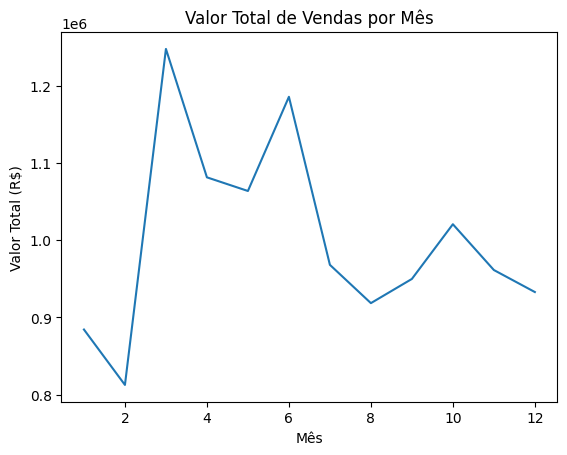

In [186]:
# Agrupando vendas por mês
vendas_mensais = df_vendas.groupby('mes')['valor_total'].sum()

# Criando um simples gráfico de linha
vendas_mensais.plot(kind='line') # O parâmetro 'kind' especifica qual tipo de gráfico queremos, nesse caso, linha (line)
plt.title('Valor Total de Vendas por Mês') # Título do gráfico
plt.xlabel('Mês') # Rótulo do eixo x
plt.ylabel('Valor Total (R$)') # Rótulo do eixo y
plt.show()

### 7.2 Gráficos de Barras
Os gráficos de barras são ótimos para comparar valores entre diferentes categorias.

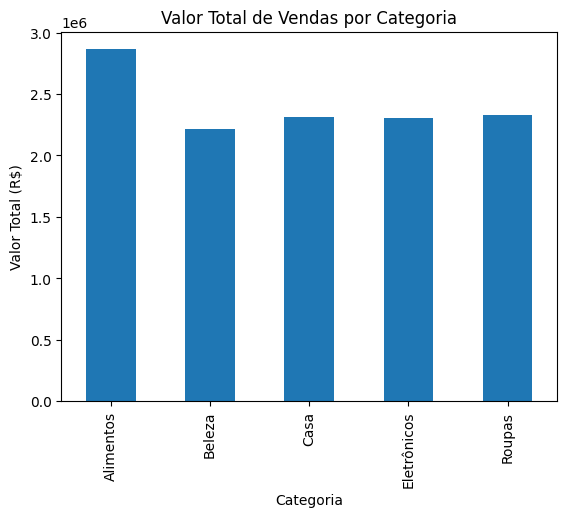

In [187]:
# Valor total de vendas por categoria
vendas_por_categoria = df_vendas.groupby('categoria')['valor_total'].sum()

# Criando um gráfico de barras simples
vendas_por_categoria.plot(kind='bar')
plt.title('Valor Total de Vendas por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Valor Total (R$)')
plt.show()

### 7.3 Histogramas
Histogramas mostram a distribuição dos seus dados, dividindo os valores em intervalos (bins).

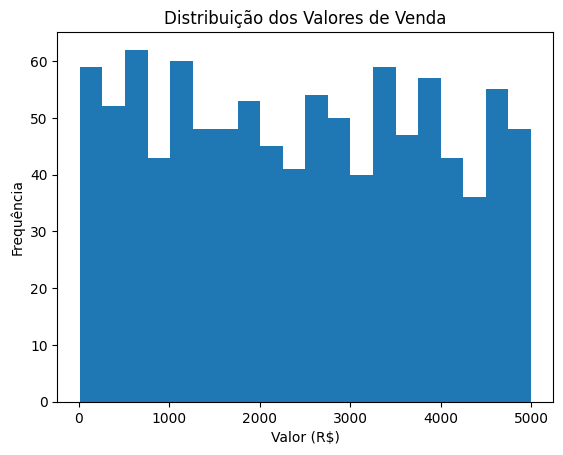

In [188]:
# Histograma dos valores de venda
df_vendas['valor_venda'].plot(kind='hist', bins=20)
plt.title('Distribuição dos Valores de Venda')
plt.xlabel('Valor (R$)')
plt.ylabel('Frequência')
plt.show()

### 7.4 Personalizando Gráficos
Você pode personalizar seus gráficos adicionando cores, marcadores e outros elementos.

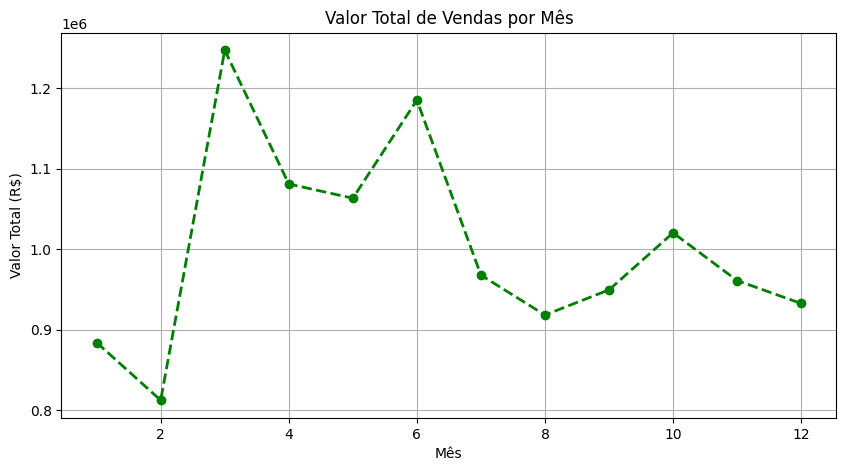

In [189]:
# Personalizando um gráfico de linha
vendas_mensais.plot(
    kind='line',
    figsize=(10, 5),   # Tamanho da figura
    color='green',     # Cor da linha
    marker='o',        # Marcador nos pontos
    linestyle='--',    # Estilo da linha
    linewidth=2        # Espessura da linha
)
plt.title('Valor Total de Vendas por Mês')
plt.xlabel('Mês')
plt.ylabel('Valor Total (R$)')
plt.grid(True)
plt.show()

#### Exercício 7: Visualização de Dados
Agora é sua vez de praticar a criação de gráficos com Pandas:

##### 7.1 Crie um gráfico de barras mostrando o número de vendas por canal_venda

<function matplotlib.pyplot.show(close=None, block=None)>

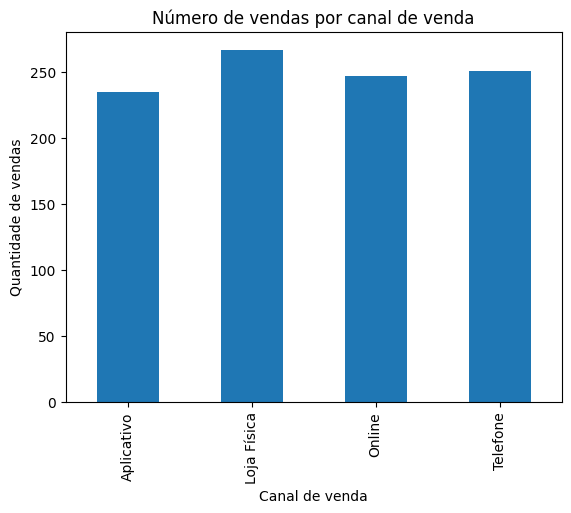

In [199]:
vendas_por_canal_venda = df_vendas.groupby('canal_venda')['quantidade'].count()
vendas_por_canal_venda.plot(kind='bar')
plt.title('Número de vendas por canal de venda')
plt.xlabel('Canal de venda')
plt.ylabel('Quantidade de vendas')
plt.show

##### 7.2 Crie um gráfico de linha simples mostrando a média de valor_venda por mês

<function matplotlib.pyplot.show(close=None, block=None)>

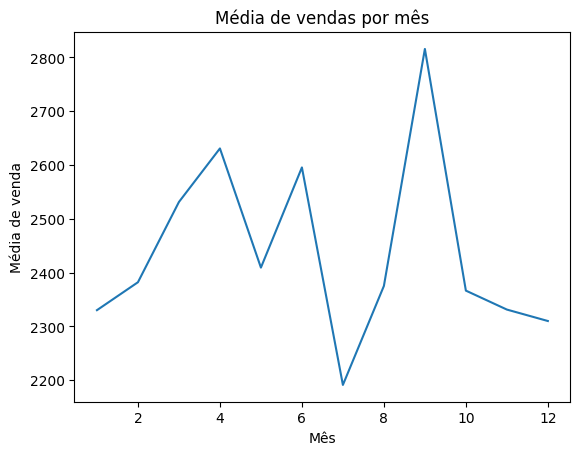

In [203]:
group_valor_venda_mensal = df_vendas.groupby('mes')['valor_venda'].mean()
group_valor_venda_mensal.plot(kind='line')
plt.title('Média de vendas por mês')
plt.xlabel('Mês')
plt.ylabel('Média de venda')
plt.show

##### 7.3 Crie um histograma da coluna 'avaliacao' e adicione um título

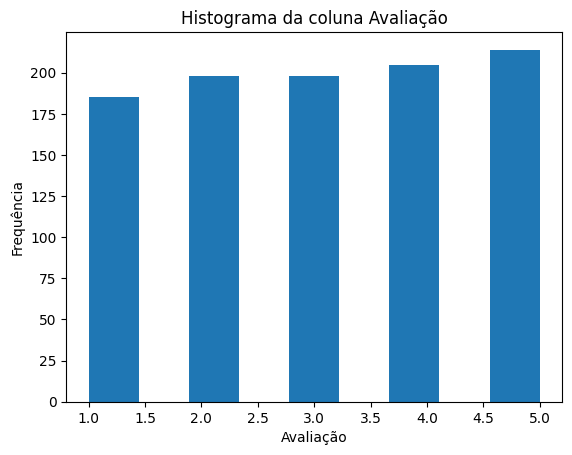

In [228]:
df_vendas['avaliacao'].plot(kind='hist', bins=9)
plt.title('Histograma da coluna Avaliação')
plt.xlabel('Avaliação')
plt.ylabel('Frequência')
plt.show()

##### 7.4 Crie um gráfico de barras mostrando o total de vendas por região

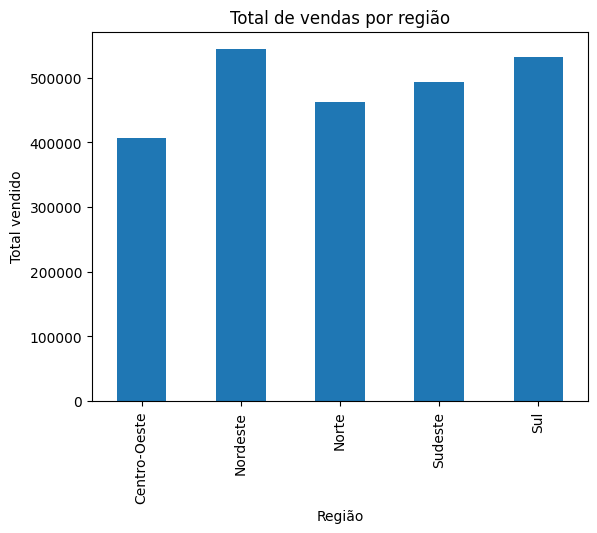

In [232]:
group_valor_venda_regiao = df_vendas.groupby('regiao')['valor_venda'].sum()
group_valor_venda_regiao.plot(kind='bar')
plt.title('Total de vendas por região')
plt.xlabel('Região')
plt.ylabel('Total vendido')
plt.show()

---

# Você Chegou ao Fim!

Parabéns por ter chegado até aqui, guerreiro(a) dos dados! 
(A não ser que você tenha pulado tudo e vindo direto pra cá... hmm, estamos de olho 👀)

Esperamos que você tenha conseguido resolver todos os exercícios - ou pelo menos tenha quebrado a cabeça tentando!

## 📋 Antes de enviar, dá uma conferida final:
- Todas as células estão funcionando? (Por favor, diz que sim 🙏)
- Você respondeu todas as questões? (Aquela do meio era difícil, né?)
- O código está rodando sem erros? (Ou sem MUITOS erros, pelo menos 😅)

## 📤 INSTRUÇÕES DE ENTREGA:
- Envie este notebook para: lads.unama@gmail.com
- Prazo: Domingo, 18/05/2025, às 23:59

Você pode mandar o arquivo direto ou o link do seu GitHub - escolha a opção que te deixa mais zen!

Boa sorte e até a próxima fase (pensamento positivo, né?)! 💪

— Equipe LADS, que já está ansiosa pra ver a magia que você fez com esses dados